In [34]:
# Import delle librerie
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


In [35]:

# Caricamento dataset
data = load_breast_cancer()

# Creo un DataFrame dalle feature
df = pd.DataFrame(data.data, columns=data.feature_names)

# Aggiungo la colonna target
df['target'] = data.target

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Numero valori nulli


In [36]:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


CONTROLLO RIGHE DUPLICATE 

In [ ]:
print(df.duplicated().sum())


0


CONTROLLO CON DESCRIBE SE CI SONO VALORI ANOMALI 

In [38]:
print(df.describe())


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Separazione feature e target

In [39]:
X = df.drop('target', axis=1)
y = df['target']

 Standardizzazione

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train/test split 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression

In [42]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.4f}")

Logistic Regression accuracy: 0.9737


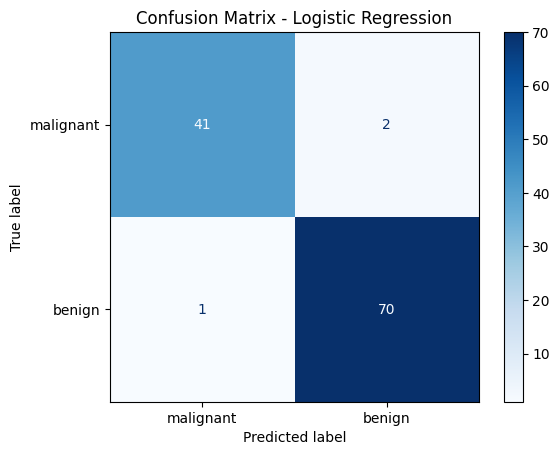

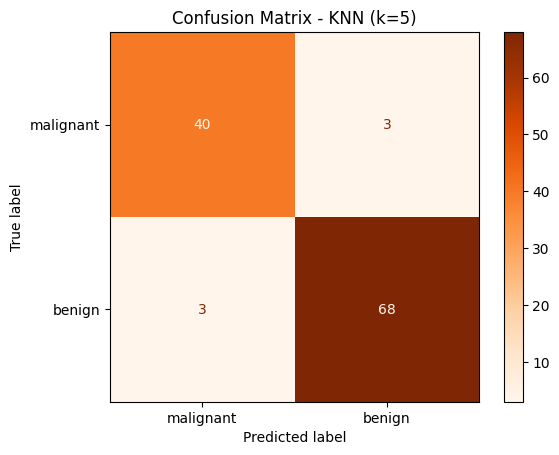

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# --- Logistic Regression ---
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=data.target_names)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# --- KNN (es. k=5) ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=data.target_names)
disp_knn.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - KNN (k=5)")
plt.show()

In [48]:
ks = range(1, 21)  
cv_scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold stratified cross-validation
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Trovo il k con l'accuratezza migliore
best_k = ks[np.argmax(cv_scores)]
print(f"Il k migliore è: {best_k} con accuratezza: {max(cv_scores):.4f}")
print(cv_scores)


ks = [2, 3, 5, 7, 9]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    print(f"KNN (k={k}, train/test split) Accuracy: {acc_knn:.4f}")

Il k migliore è: 9 con accuratezza: 0.9684
[np.float64(0.9507685142058687), np.float64(0.9419189566837447), np.float64(0.9577705325260053), np.float64(0.9612793044558299), np.float64(0.9648501785437045), np.float64(0.9630802670392795), np.float64(0.9683589504735289), np.float64(0.9683434249340165), np.float64(0.968390001552554), np.float64(0.9648657040832168), np.float64(0.9631113181183046), np.float64(0.9648657040832168), np.float64(0.9648812296227295), np.float64(0.9666356155876417), np.float64(0.9613569321533924), np.float64(0.9648657040832168), np.float64(0.9578326346840551), np.float64(0.9578326346840551), np.float64(0.9543238627542309), np.float64(0.952585002328831)]
KNN (k=2, train/test split) Accuracy: 0.9386
KNN (k=3, train/test split) Accuracy: 0.9474
KNN (k=5, train/test split) Accuracy: 0.9474
KNN (k=7, train/test split) Accuracy: 0.9474
KNN (k=9, train/test split) Accuracy: 0.9649


In [52]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr, X_scaled, y, cv=skf, scoring='accuracy')
print(lr_cv_scores)
np.mean(lr_cv_scores) 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(lr, X_scaled, y, cv=kf, scoring='accuracy')

# Media e deviazione standard
kf_mean = np.mean(kf_scores)
kf_std  = np.std(kf_scores)

print("KFold scores per fold:", kf_scores)
print(f"KFold mean: {kf_mean:.4f}, KFold std: {kf_std:.4f}")

[0.97368421 0.94736842 0.96491228 0.99122807 0.99115044]
KFold scores per fold: [0.97368421 0.98245614 0.96491228 0.99122807 0.97345133]
KFold mean: 0.9771, KFold std: 0.0090


In [56]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores = cross_val_score(lr, X_scaled, y, cv=skf, scoring='accuracy')

# Media e deviazione standard
skf_mean = np.mean(skf_scores)
skf_std  = np.std(skf_scores)

print("StratifiedKFold scores per fold:", skf_scores)
print(f"StratifiedKFold mean: {skf_mean:.4f}, StratifiedKFold std: {skf_std:.4f}")
# Creazione DataFrame per visualizzare meglio
df_results = pd.DataFrame({
    'Fold 1': [kf_scores[0], skf_scores[0]],
    'Fold 2': [kf_scores[1], skf_scores[1]],
    'Fold 3': [kf_scores[2], skf_scores[2]],
    'Fold 4': [kf_scores[3], skf_scores[3]],
    'Fold 5': [kf_scores[4], skf_scores[4]],
    'Mean': [kf_mean, skf_mean],
    'Std': [kf_std, skf_std]
}, index=['KFold', 'StratifiedKFold'])

print(df_results)
from sklearn.neighbors import KNeighborsClassifier

ks = [2, 3, 5, 7, 9]
results = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    kf_scores = cross_val_score(knn, X_scaled, y, cv=KFold(n_splits=5, shuffle=True, random_state=42))
    skf_scores = cross_val_score(knn, X_scaled, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    
    results.append({
        'k': k,
        'KFold_mean': np.mean(kf_scores),
        'KFold_std': np.std(kf_scores),
        'SKF_mean': np.mean(skf_scores),
        'SKF_std': np.std(skf_scores)
    })

df_knn_results = pd.DataFrame(results)
print(df_knn_results)


StratifiedKFold scores per fold: [0.97368421 0.94736842 0.96491228 0.99122807 0.99115044]
StratifiedKFold mean: 0.9737, StratifiedKFold std: 0.0166
                   Fold 1    Fold 2    Fold 3    Fold 4    Fold 5      Mean  \
KFold            0.973684  0.982456  0.964912  0.991228  0.973451  0.977146   
StratifiedKFold  0.973684  0.947368  0.964912  0.991228  0.991150  0.973669   

                      Std  
KFold            0.008964  
StratifiedKFold  0.016627  
   k  KFold_mean  KFold_std  SKF_mean   SKF_std
0  2    0.943751   0.015333  0.945505  0.020347
1  3    0.961310   0.014345  0.968343  0.015357
2  5    0.959525   0.019092  0.966605  0.014043
3  7    0.961295   0.016423  0.959587  0.014230
4  9    0.968312   0.017378  0.964850  0.012406


In [57]:
from sklearn.metrics import make_scorer, recall_score

# Per recall della classe positiva (1 = maligno)
recall_scorer = make_scorer(recall_score)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_recall = cross_val_score(knn, X_scaled, y, cv=skf, scoring=recall_scorer)
print("Recall per fold:", scores_recall)
print("Mean recall:", np.mean(scores_recall))

Recall per fold: [1.         1.         0.98611111 0.95833333 1.        ]
Mean recall: 0.9888888888888889


In [59]:
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

# Lista di k da testare
ks = [2, 3, 5, 7, 9]

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepariamo la tabella dei risultati
results = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Recall
    recall_scorer = make_scorer(recall_score)
    recall_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring=recall_scorer)
    
    # Precision
    precision_scorer = make_scorer(precision_score)
    precision_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring=precision_scorer)
    
    # F1-score
    f1_scorer = make_scorer(f1_score)
    f1_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring=f1_scorer)
    
    results.append({
        'k': k,
        'Recall_mean': np.mean(recall_scores),
        'Recall_std': np.std(recall_scores),
        'Precision_mean': np.mean(precision_scores),
        'Precision_std': np.std(precision_scores),
        'F1_mean': np.mean(f1_scores),
        'F1_std': np.std(f1_scores)
    })

# Creazione DataFrame
df_results = pd.DataFrame(results)
print(df_results)

   k  Recall_mean  Recall_std  Precision_mean  Precision_std   F1_mean  \
0  2     0.941354    0.026698        0.971732       0.023552  0.955919   
1  3     0.991667    0.011111        0.960240       0.027530  0.975376   
2  5     0.991667    0.011111        0.957538       0.025442  0.974015   
3  7     0.986072    0.015215        0.952671       0.030978  0.968565   
4  9     0.988889    0.016197        0.957538       0.025442  0.972577   

     F1_std  
0  0.016500  
1  0.011717  
2  0.010642  
3  0.010520  
4  0.009343  


MSE: 0.0526
RMSE: 0.2294


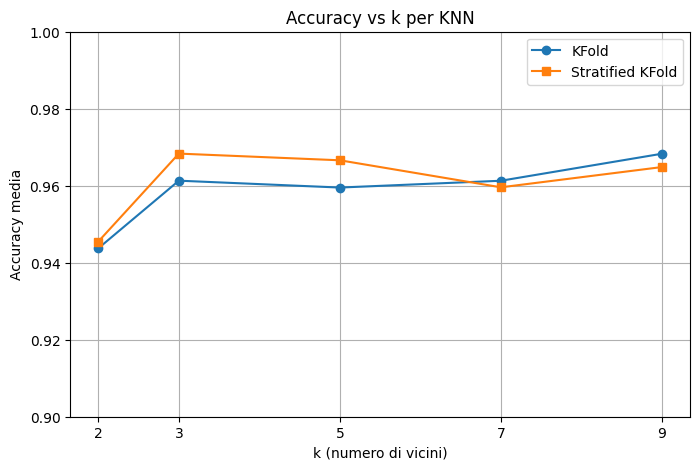

In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train, y_train)

# Predizioni
y_pred = knn_final.predict(X_test)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)
# Lista dei k da testare
ks = [2, 3, 5, 7, 9]

kf_means = []
skf_means = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # KFold semplice
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='accuracy')
    kf_means.append(np.mean(kf_scores))
    
    # Stratified KFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    skf_scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
    skf_means.append(np.mean(skf_scores))
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
# Creazione del grafico
plt.figure(figsize=(8,5))
plt.plot(ks, kf_means, marker='o', label='KFold')
plt.plot(ks, skf_means, marker='s', label='Stratified KFold')
plt.title('Accuracy vs k per KNN')
plt.xlabel('k (numero di vicini)')
plt.ylabel('Accuracy media')
plt.xticks(ks)
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.legend()
plt.show()